In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate as scipy_rotate

# sharpening

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


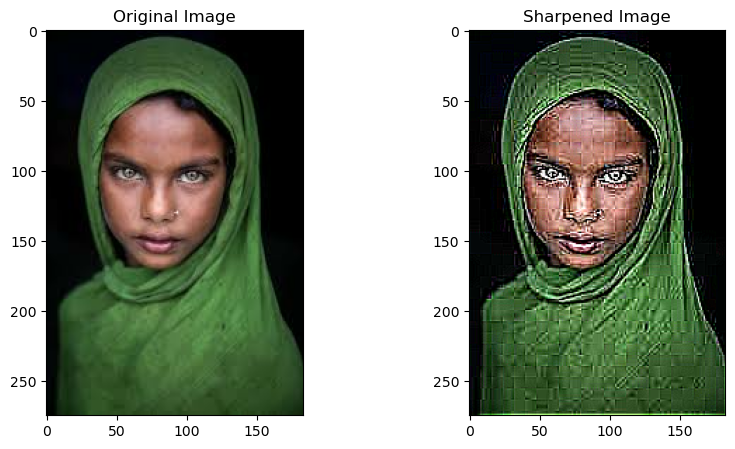

In [32]:
sharpening_kernel = np.array([[-1,-1,-1],
                              [-1, 9,-1],
                              [-1,-1,-1]])

# Function to apply a filter to an image
def apply_filter(image, kernel):
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    kernel = tf.convert_to_tensor(kernel, dtype=tf.float32)
    kernel = tf.expand_dims(tf.expand_dims(kernel, -1), -1)
    kernel = tf.tile(kernel, [1, 1, image.shape[-1], 1])
    image = tf.expand_dims(image, 0)
    filtered_image = tf.nn.depthwise_conv2d(image, kernel, [1, 1, 1, 1], padding='SAME')
    return tf.squeeze(filtered_image)

# Load and preprocess an image
image = tf.image.decode_image(tf.io.read_file('images/download.jpeg'))
image = tf.image.convert_image_dtype(image, tf.float32)

# Apply sharpening filter
sharpened_image = apply_filter(image, sharpening_kernel)

# Display the original and sharpened images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_image)
plt.show()

# smoothing

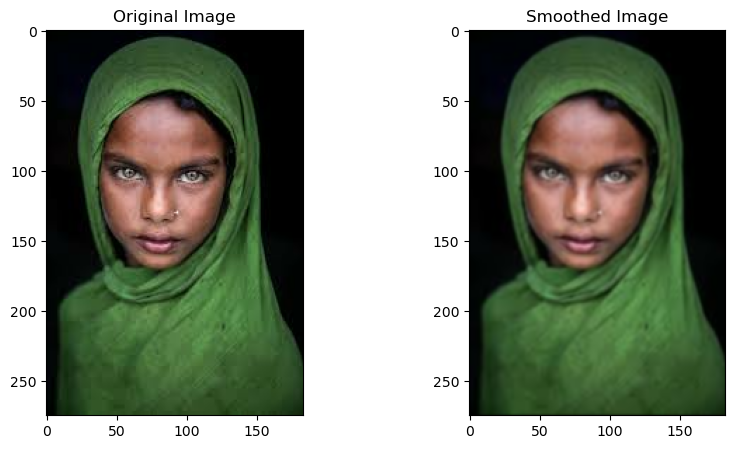

In [34]:
# Smoothing filter kernel (Gaussian blur)
smoothing_kernel = np.array([[1/16, 2/16, 1/16],
                             [2/16, 4/16, 2/16],
                             [1/16, 2/16, 1/16]])

# Apply smoothing filter
smoothed_image = apply_filter(image, smoothing_kernel)

# Display the original and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Smoothed Image')
plt.imshow(smoothed_image)
plt.show()


# enhance

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


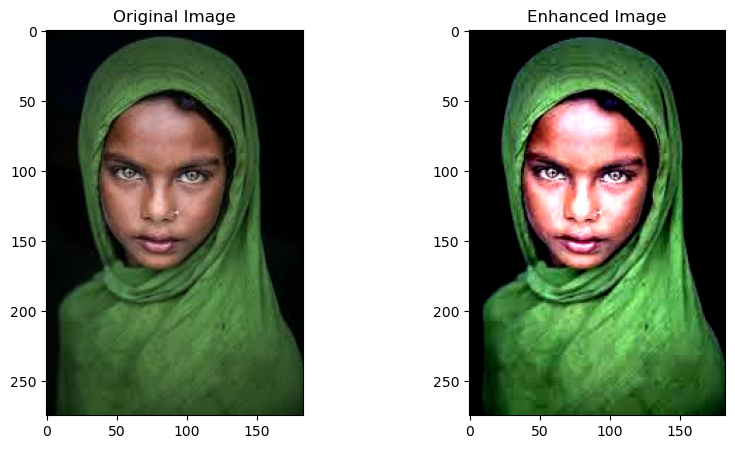

In [36]:
# Contrast enhancement using TensorFlow
def enhance_contrast(image, factor=2.0):
    return tf.image.adjust_contrast(image, factor)

# Apply contrast enhancement
enhanced_image = enhance_contrast(image)

# Display the original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Enhanced Image')
plt.imshow(enhanced_image)
plt.show()


# adjust_saturation

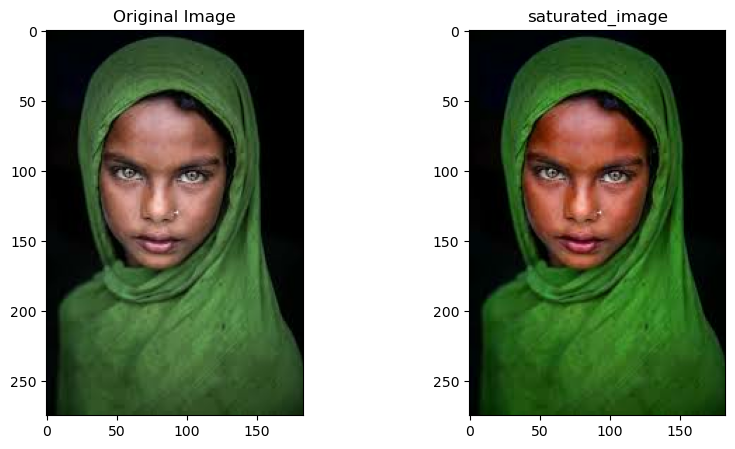

In [38]:
def adjust_saturation(image, factor=1.5):
    return tf.image.adjust_saturation(image, factor)

saturated_image = adjust_saturation(image)

# Display the original and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('saturated_image')
plt.imshow(saturated_image)
plt.show()


# adjust_hue

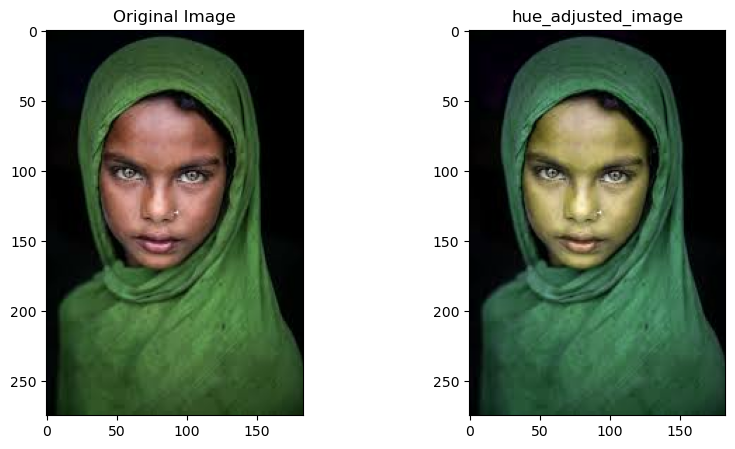

In [40]:
def adjust_hue(image, delta=0.1):
    return tf.image.adjust_hue(image, delta)

hue_adjusted_image = adjust_hue(image)
# Display the original and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('hue_adjusted_image')
plt.imshow(hue_adjusted_image)
plt.show()

# enhance_contrast

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


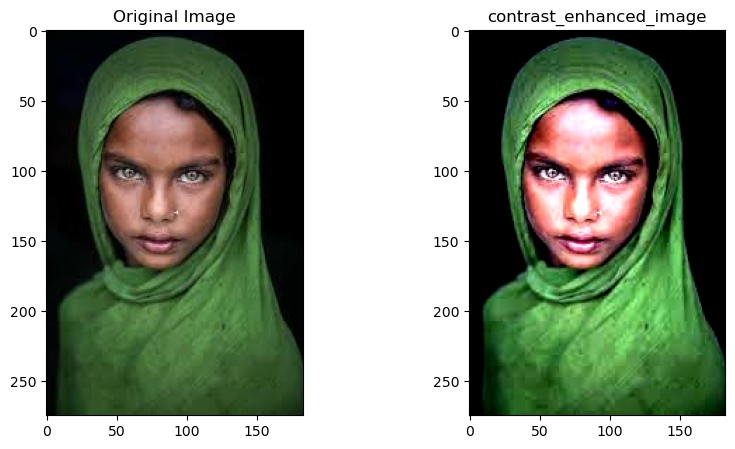

In [42]:
def enhance_contrast(image, factor=2.0):
    return tf.image.adjust_contrast(image, factor)

contrast_enhanced_image = enhance_contrast(image)
# Display the original and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('contrast_enhanced_image')
plt.imshow(contrast_enhanced_image)
plt.show()

# invert_colors

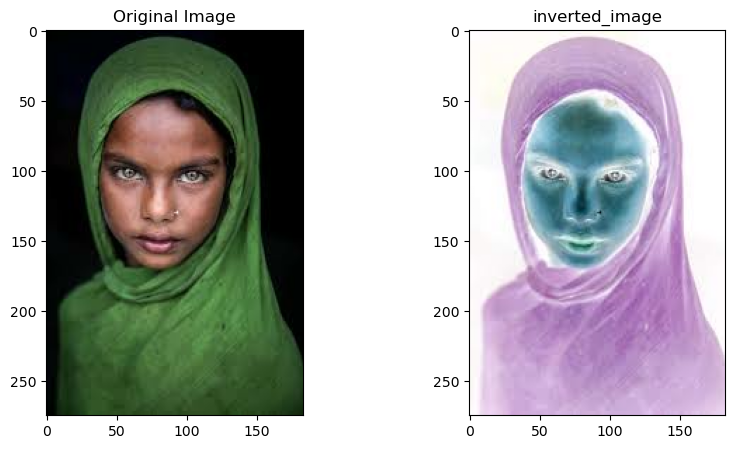

In [44]:
def invert_colors(image):
    return 1.0 - image

inverted_image = invert_colors(image)

# Display the original and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('inverted_image')
plt.imshow(inverted_image)
plt.show()

# apply_sepia

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


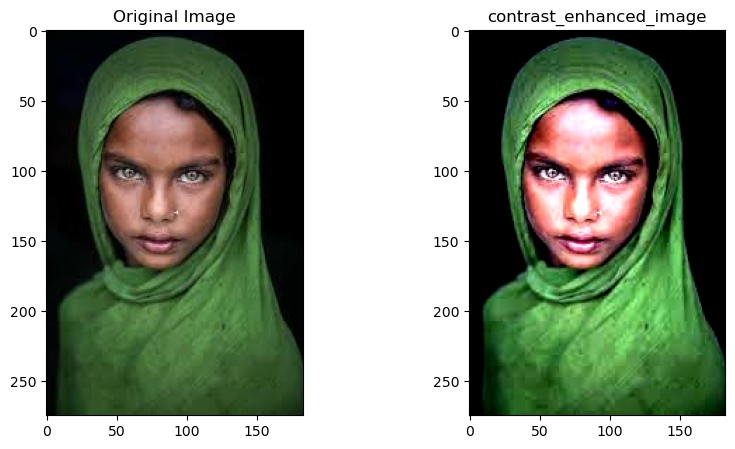

In [46]:
def apply_sepia(image):
    sepia_kernel = tf.constant([[0.393, 0.769, 0.189],
                                [0.349, 0.686, 0.168],
                                [0.272, 0.534, 0.131]], dtype=tf.float32)
    sepia_image = tf.tensordot(image, sepia_kernel, axes=[[2], [1]])
    return tf.clip_by_value(sepia_image, 0.0, 1.0)

sepia_image = apply_sepia(image)

def adjust_brightness(image, delta=0.1):
    return tf.image.adjust_brightness(image, delta)

contrast_enhanced_image = enhance_contrast(image)
# Display the original and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('contrast_enhanced_image')
plt.imshow(contrast_enhanced_image)
plt.show()

# More

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


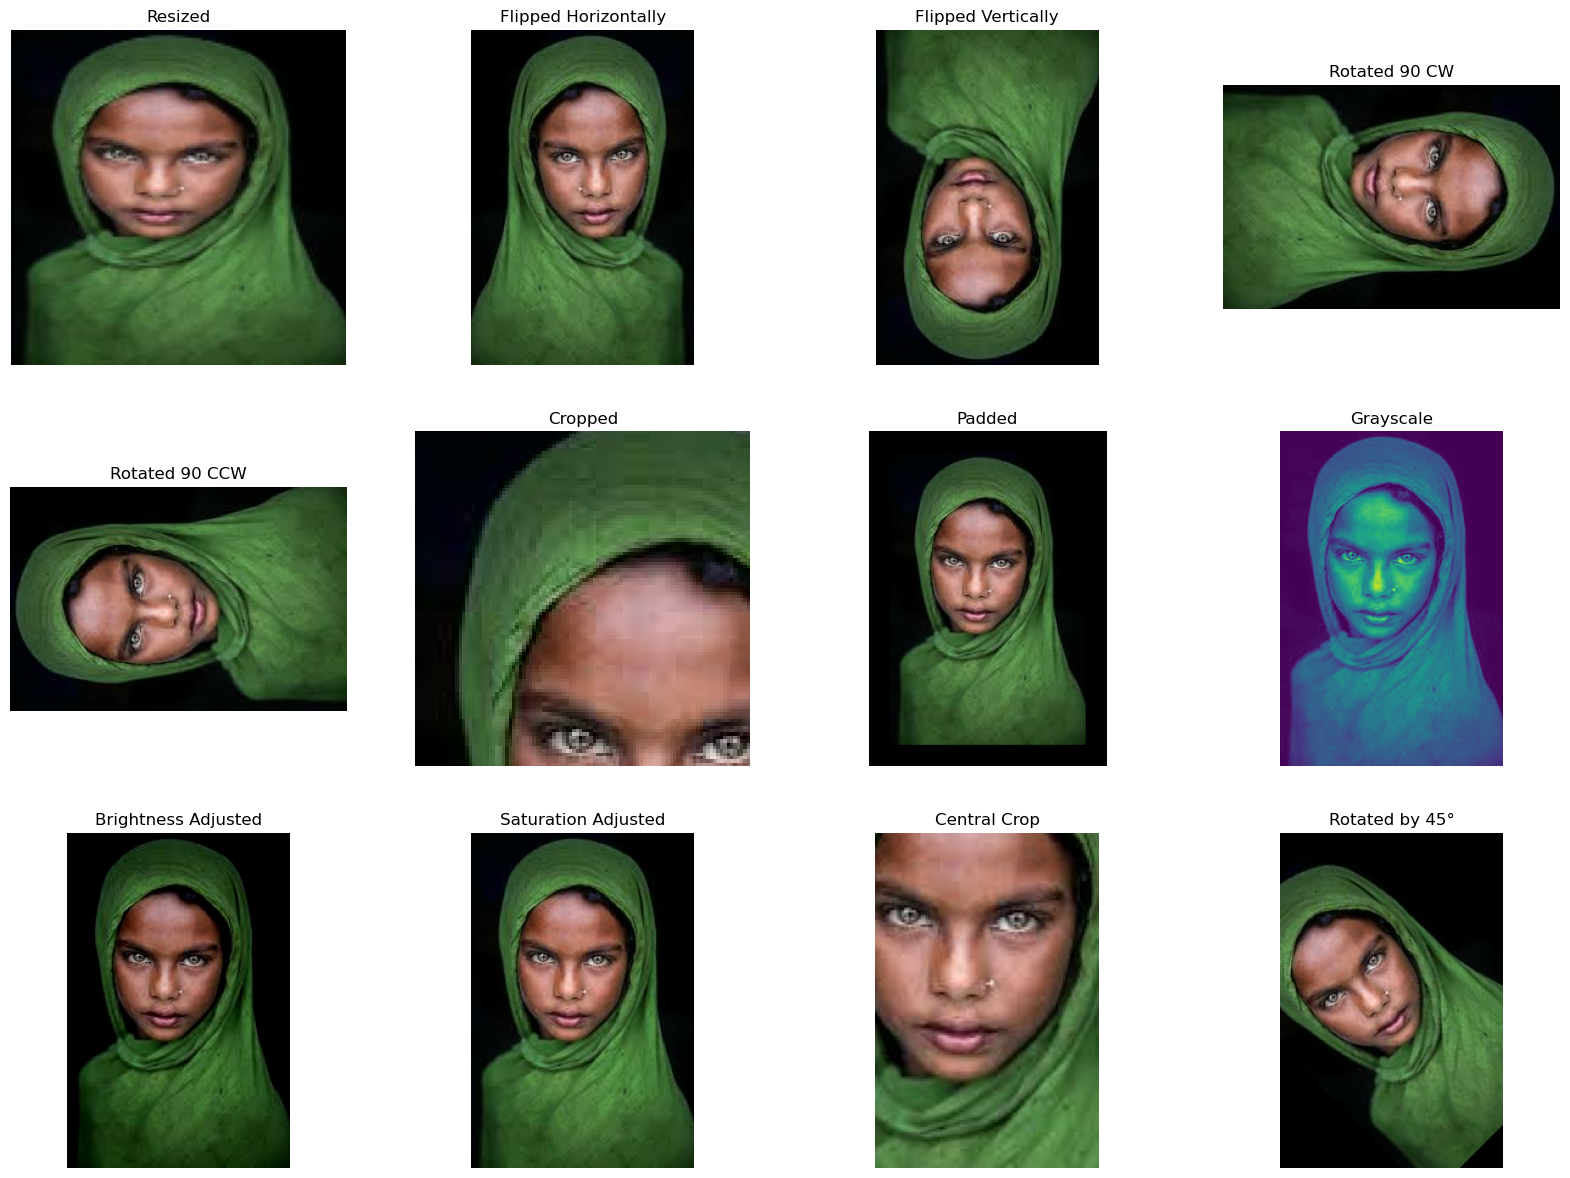

In [48]:
# 1. Resizing
def resize_image(image, new_height, new_width):
    return tf.image.resize(image, [new_height, new_width])

resized_image = resize_image(image, 128, 128)

# 2. Flipping (Horizontal and Vertical)
def flip_image_horizontally(image):
    return tf.image.flip_left_right(image)

flipped_image_h = flip_image_horizontally(image)

def flip_image_vertically(image):
    return tf.image.flip_up_down(image)

flipped_image_v = flip_image_vertically(image)

# 3. Rotating (90 degrees)
def rotate_image_90_clockwise(image):
    return tf.image.rot90(image, k=3)

rotated_image_90_cw = rotate_image_90_clockwise(image)

def rotate_image_90_counterclockwise(image):
    return tf.image.rot90(image, k=1)

rotated_image_90_ccw = rotate_image_90_counterclockwise(image)

# 4. Cropping
def crop_image(image, offset_height, offset_width, target_height, target_width):
    return tf.image.crop_to_bounding_box(image, offset_height, offset_width, target_height, target_width)

cropped_image = crop_image(image, 10, 10, 100, 100)

# 5. Padding
def pad_image(image, padding_height, padding_width):
    return tf.image.pad_to_bounding_box(image, padding_height, padding_width, image.shape[0] + 2 * padding_height, image.shape[1] + 2 * padding_width)

padded_image = pad_image(image, 20, 20)

# 6. Grayscale Conversion
def convert_to_grayscale(image):
    return tf.image.rgb_to_grayscale(image)

grayscale_image = convert_to_grayscale(image)

# 7. Random Brightness Adjustment
def random_brightness(image, max_delta=0.2):
    return tf.image.random_brightness(image, max_delta)

brightness_adjusted_image = random_brightness(image)

# 8. Random Saturation Adjustment
def random_saturation(image, lower=0.5, upper=1.5):
    return tf.image.random_saturation(image, lower, upper)

saturation_adjusted_image = random_saturation(image)

# 9. Central Crop
def central_crop(image, central_fraction=0.5):
    return tf.image.central_crop(image, central_fraction)

center_cropped_image = central_crop(image)

# 10. Rotate by Arbitrary Angle using scipy
def rotate_image(image, angle):
    # Convert to numpy array if the image is a TensorFlow tensor
    if isinstance(image, tf.Tensor):
        image = image.numpy()
    
    # Rotate the image by the specified angle
    rotated_image = scipy_rotate(image, angle, reshape=False)
    
    # Convert back to tensor if needed
    return tf.convert_to_tensor(rotated_image)

# Example usage: Rotate by 45 degrees
rotated_image = rotate_image(image, 45)

# Displaying the Transformed Images
transformations = {
    'Resized': resized_image,
    'Flipped Horizontally': flipped_image_h,
    'Flipped Vertically': flipped_image_v,
    'Rotated 90 CW': rotated_image_90_cw,
    'Rotated 90 CCW': rotated_image_90_ccw,
    'Cropped': cropped_image,
    'Padded': padded_image,
    'Grayscale': grayscale_image,
    'Brightness Adjusted': brightness_adjusted_image,
    'Saturation Adjusted': saturation_adjusted_image,
    'Central Crop': center_cropped_image,
    'Rotated by 45°': rotated_image
}

plt.figure(figsize=(20, 20))
for i, (title, img) in enumerate(transformations.items(), 1):
    plt.subplot(4, 4, i)
    plt.title(title)
    plt.imshow(tf.squeeze(img))  # Use squeeze to handle grayscale images
    plt.axis('off')
plt.show()
